In [1]:
import cv2
import matplotlib.pyplot as plt
# import pandas as pd
import tensorflow as tf
import keras
import os
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
# from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
import shutil
PATH = "/mnt/d/Datasets/"
imgPATH = PATH + "mini-DDSM/MINI-DDSM-Complete-PNG-16/"
ddsm_roi_path = PATH + "CBIS-DDSM/ROI/"
cbis_ddsm_data_path = PATH + 'CBIS-DDSM/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/'
vindr_roi_path = PATH+"/Vindr-Mammo/ROI/"
data_path = PATH + "mini-DDSM/fullimg/"
save_dir = "/home/jj/FYP/Models/"
combined_path = PATH + "combined/"
full_img_path = '/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/'
roi_img_path = '/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/'
image_size = 300
img_height = 300
img_width = 300
batch_size = 4
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-02-13 08:55:07.358411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 08:55:08.478344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jj/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/jj/miniconda3/envs/tf/lib/
2023-02-13 08:55:08.478644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugi

Num GPUs Available:  1


2023-02-13 08:55:09.928399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-13 08:55:09.953132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-13 08:55:09.953172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# class_names = ['benign','malignant']
# for i in list_train.take(1):
    # parts = tf.strings.split(i, os.path.sep)
    # if parts[-2] == 'benign':
        # label=[1,0]
    # else:
        # label=[0,1]
    # print(label)

In [3]:
# img_height=1024
# img_width=512

In [4]:
# AUTOTUNE = tf.data.AUTOTUNE
# def find_label(file_path):
#     patient_info = tf.strings.split(file_path, sep='/')[-1]
#     info = tf.strings.split(patient_info,sep='_')
#     patient_id = info[1]+ '_' + info[2]
#     mam_type = info[0]
#     view = tf.strings.split(info[4],sep='.')[0]
#     augment=False
#     if mam_type =='Calc-Test': 
#         x = tf.convert_to_tensor(calc_test)
#     elif mam_type == 'Calc-Training': 
#         x = tf.convert_to_tensor(calc_train)
#         augment=True
#     elif mam_type == 'Mass-Training': 
#         x = tf.convert_to_tensor(mass_train)
#         augment=True
#     else: 
#         x = tf.convert_to_tensor(mass_test)
#     label=[0,0]
#     for y in x:
#         if y[0] == patient_id and y[1] == info[3] and y[2] == view:
#             if y[3] == 'MALIGNANT':
#                 label = [0,1]
#             else:
#                 label = [1,0]
#     return label
# @tf.function
# def get_label(file_path):
  # The second to last is the class-directory
    # parts = tf.strings.split(file_path, os.path.sep)
    # if parts[-2] == 'benign':
        # label=[1,0]
    # else:
        # label=[0,1]
    # return label
# @tf.function
# def load_image(image):
    # img = tf.io.read_file(image)
    # img = tf.io.decode_png(img,channels=3)
    # return tf.image.resize_with_pad(img,img_height,img_width)
# @tf.function
# def process_data(file_path):
    # label = get_label(file_path)
    # image = load_image(file_path)
    # image = data_augmentation(image)
    # return image, label
# @tf.function
# def load_data(file_path):
    # label = get_label(file_path)
    # image = load_image(file_path)
    # return image, label

In [5]:
# train_ds = list_train.shuffle(len(list_train)).repeat(2).map(process_data, num_parallel_calls=AUTOTUNE)
# val_ds = list_val.shuffle(len(list_train)).map(load_data, num_parallel_calls=AUTOTUNE)

In [6]:
# for i in val_ds.take(10):
    # print(i[1])

In [7]:
# list_ds = tf.data.Dataset.list_files(str(ddsm_roi_path+"train"), shuffle=False)

In [8]:
# image = tf.keras.utils.load_img(ddsm_roi_path+"train/benign/P_00004_LEFT_CC_1.png")
# image = tf.keras.utils.img_to_array(image)
# # image = tf.cast(tf.expand_dims(image, 0), tf.float32)
# image_aug = data_augmentation(image)
# image_aug = preprocess_input(image_aug)
# image_aug = np.interp(image_aug,[-1,1],[0,1])
# plt.imshow(image_aug)
# # image_aug

In [9]:
# def load_image(directory):
#     for dirName, subdirList, fileList in os.walk(directory):
#         for fname in fileList:
#             if fname.endswith('.png'):
#                 image = tf.keras.utils.load_img(directory+fname)

# load ddsm

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  # validation_split=0.2,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  # validation_split=0.2,
  # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6448 files belonging to 2 classes.


2023-02-13 08:55:23.557413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 08:55:23.558038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-13 08:55:23.558083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-13 08:55:23.558099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

Found 1189 files belonging to 2 classes.


# load vindr

In [11]:
# train_vindr = tf.keras.utils.image_dataset_from_directory(
#   vindr_roi_path+'train',
#   # data_path,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(image_size, image_size),
#   batch_size=None)
# val_vindr = tf.keras.utils.image_dataset_from_directory(
#   vindr_roi_path+'train',
#   # data_path,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(image_size, image_size),
#   batch_size=None)

# combined

In [12]:
# train_combined = tf.keras.utils.image_dataset_from_directory(
#   combined_path+'train',
#   # data_path,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(image_size, image_size),
#   batch_size=1)
# val_combined = tf.keras.utils.image_dataset_from_directory(
#   combined_path+'train',
#   # data_path,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(image_size, image_size),
#   batch_size=1)

In [13]:
preprocessing = preprocess_input
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
pre_trained.trainable = False
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation((0,0.2),fill_mode='constant'),
  tf.keras.layers.RandomZoom(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2),fill_mode='constant'),
  tf.keras.layers.RandomTranslation(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),fill_mode='constant')
  ])
#Define model architect
tfinput = Input(shape=(img_height,img_width,3))
# data_augment = data_augmentation(tfinput,training=True)
pre_process = preprocessing(tfinput)
inceptionv3_model=pre_trained(pre_process,training=False)
flatten = tf.keras.layers.GlobalAveragePooling2D()(inceptionv3_model)
# flatten = tf.keras.layers.Flatten()(inceptionv3_model)
# DO1 = Dropout(0.8)(flatten)
# x = Dense(1024,activation = 'relu')(flatten)
# x = Dense(512,activation='relu')(x)
x = Dense(8,activation = 'relu')(flatten)
x = Dense(8,activation='relu')(x)
x=Dropout(0.5)(x)
# x = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.1))(x)
x = Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.1))(x)
# output = Dense(1, activation="sigmoid")(DO2)
output = Dense(2, activation="softmax")(x)
model = Model(tfinput,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [14]:

# def prepare(ds, shuffle=False, augment=False,batch_size=32):
#   # # Resize and rescale all datasets.
  
#   data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal_and_vertical'),
#   tf.keras.layers.RandomRotation((0,0.3),fill_mode="constant"),
#   tf.keras.layers.RandomZoom(height_factor=(-0.5,0.5),width_factor=(-0.5,0.5),fill_mode="constant"),
#   tf.keras.layers.RandomTranslation(height_factor=(-0.25,0.25),width_factor=(-0.25,0.25),fill_mode="constant")
#   ])
#   if shuffle:
#     ds = ds.shuffle(1000)

  
#   # ds = ds.batch(batch_size)

#   # Use data augmentation only on the training set.
#   if augment:
#     # ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
#     #           num_parallel_calls=AUTOTUNE)
#     ds = ds.map(lambda x, y: (data_augmentation(x,training=True),y), 
#                 num_parallel_calls=AUTOTUNE)
#   # Batch all datasets.
  
#   # print(ds)
#   # Use buffered prefetching on all datasets.
#   return ds.prefetch(buffer_size=AUTOTUNE)

In [15]:
# # train_ds = train_ds.rebatch(1)
# train_ds = train_ds.take(10)
# for i in train_ds:
#   print(i[1])
# val_ds = val_ds.take(10)

In [16]:
# train_ds.class_names
# train_ds.file_paths

In [17]:
# @tf.function
AUTOTUNE = tf.data.AUTOTUNE
def fetch(data):
    # data=data.cache()
    data = data.batch(4)
    data=data.prefetch(buffer_size=AUTOTUNE)
    return data

In [18]:
train_ds_aug = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds_aug= val_ds.prefetch(buffer_size=AUTOTUNE)

# train_ds_aug = fetch(train_ds)
# val_ds_aug= fetch(val_ds)

In [19]:
# for i in val_ds_aug.take(1):
    # plt.imshow(i[0][0]/255)

# initialising

In [20]:
# init_lr = 1e-3
# steps = 1e3
# final_lr = 1e-4
# lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay( init_lr
#                                                             ,steps
#                                                             ,final_lr
#                                                             ,power=0.5)

In [21]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)]
    # ,jit_compile=True
)
model.summary()
checkpoint_path = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/dense_init_checkpoint/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_categorical_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

Epoch 1/10


2023-02-13 08:55:33.573243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-13 08:55:36.630814: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.00GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-13 08:55:36.630878: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.00GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-13 08:55:36.650330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-13 08:55:36.663538: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1

1612/1612 [==============================] - ETA: 0s - loss: 0.7795 - categorical_accuracy: 0.5797 - precision: 0.5882 - precision_1: 0.5520
Epoch 1: val_categorical_accuracy improved from -inf to 0.71320, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/dense_init_checkpoint/cp-0001.ckpt
1612/1612 [==============================] - 54s 29ms/step - loss: 0.7795 - categorical_accuracy: 0.5797 - precision: 0.5882 - precision_1: 0.5520 - val_loss: 0.6037 - val_categorical_accuracy: 0.7132 - val_precision: 0.7319 - val_precision_1: 0.6704
Epoch 2/10
1610/1612 [============================>.] - ETA: 0s - loss: 0.6518 - categorical_accuracy: 0.6194 - precision: 0.6182 - precision_1: 0.6228
Epoch 2: val_categorical_accuracy improved from 0.71320 to 0.71993, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/dense_init_checkpoint/cp-0002.ckpt
1612/1612 [==============================] - 46s 29ms/step - loss: 0.6518 - categorical_accuracy: 0.6196 - precision: 0.6

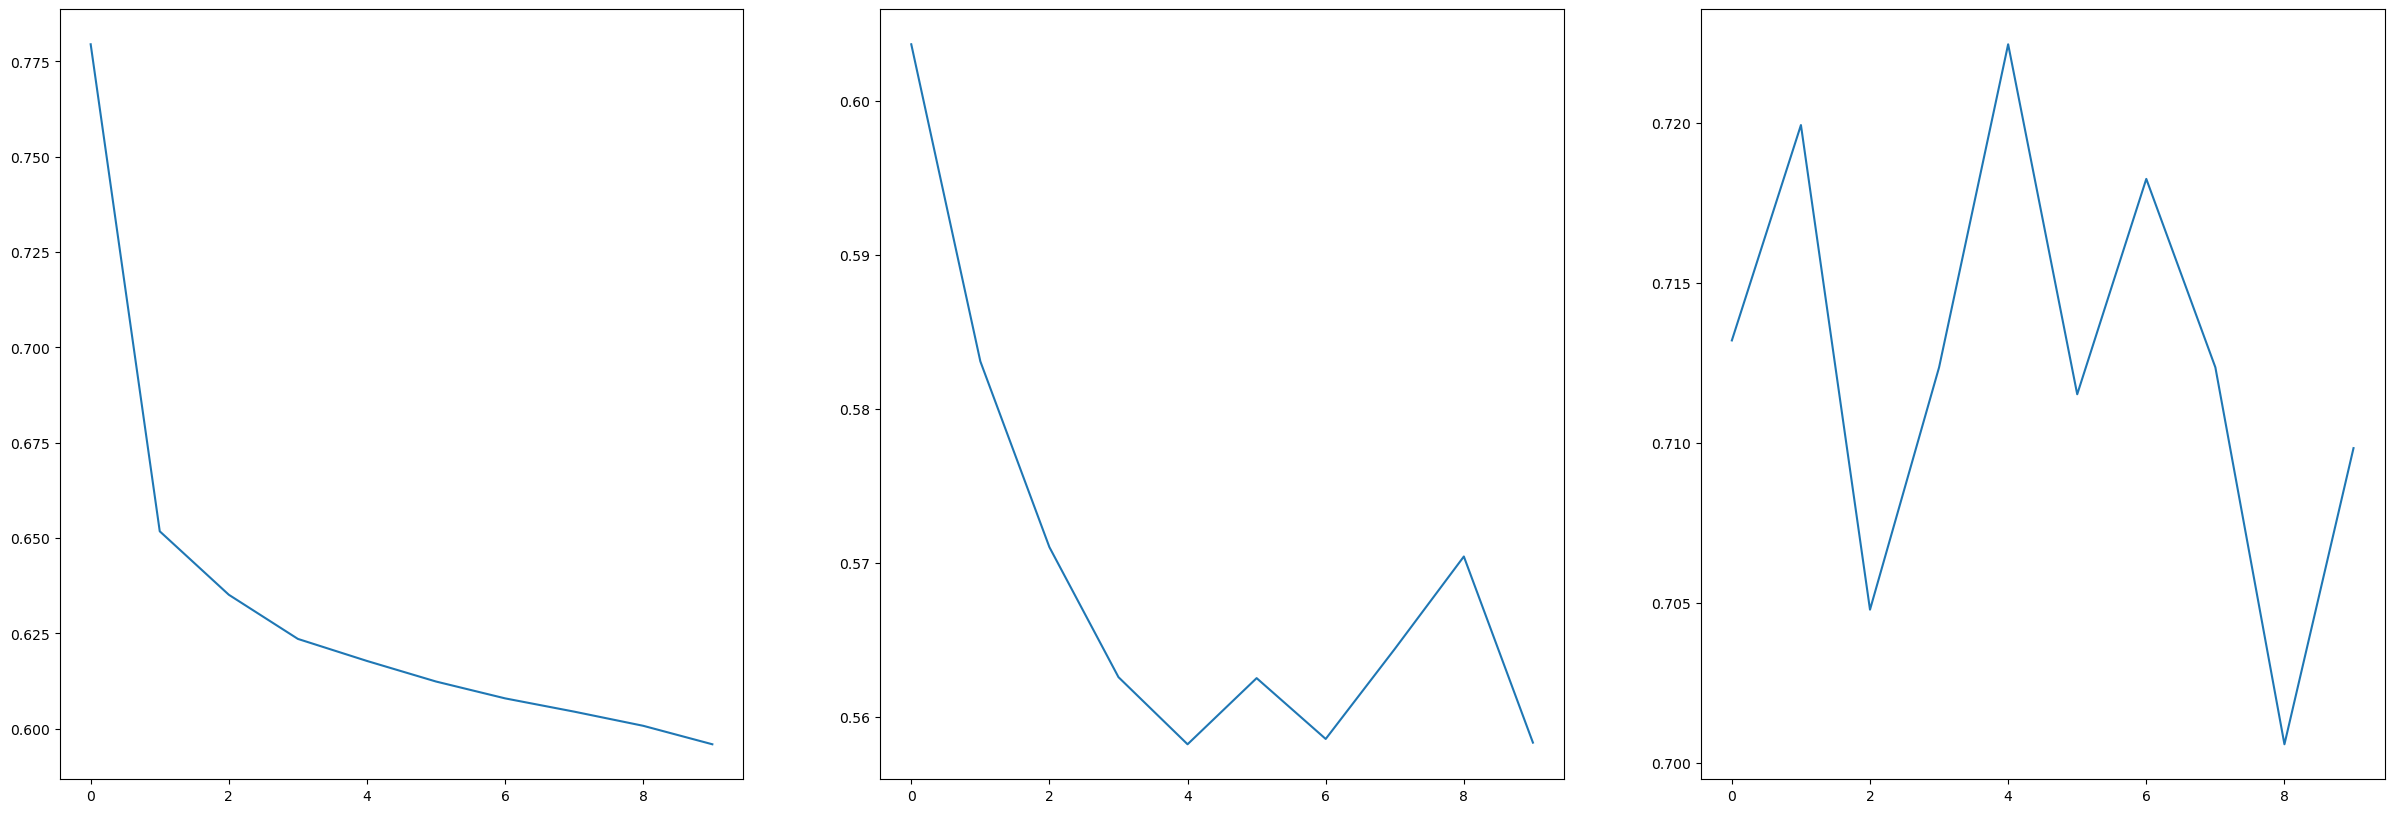

In [22]:
#Training Dense layers to initialise the categoriser before fine tuning the CNN models
with tf.device('/GPU:0'):
    total_epochs = 10
    dense_init = model.fit(train_ds_aug
                        ,epochs=total_epochs
                        ,validation_data=val_ds_aug
                        ,callbacks = [cp_callback]
                        )

# model.save(save_dir + "inceptionv3")
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(dense_init.history['loss'])
plt.subplot(132)
plt.plot(dense_init.history['val_loss'])
plt.subplot(133)
plt.plot(dense_init.history['val_categorical_accuracy'])
tf.keras.backend.clear_session()

# fine tuning

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

/home/jj/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1611/1612 [============================>.] - ETA: 0s - loss: 0.6075 - categorical_accuracy: 0.6775 - precision: 0.7044 - precision_1: 0.6419
Epoch 1: val_loss improved from inf to 0.55745, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/fine_tuning_checkpoint_loss/cp-0001.ckpt

Epoch 1: val_categorical_accuracy improved from -inf to 0.71405, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/fine_tuning_checkpoint_acc/cp-0001.ckpt
1612/1612 [==============================] - 61s 36ms/step - loss: 0.6075 - categorical_accuracy: 0.6776 - precision: 0.7043 - precision_1: 0.6422 - val_loss: 0.5575 - val_categorical_accuracy: 0.7140 - val_precision: 0.7267 - val_precision_1: 0.6824 - lr: 1.0000e-04
Epoch 2/50
1611/1612 [============================>.] - ETA: 0s - loss: 0.5929 - categorical_accuracy: 0.6889 - precision: 0.7121 - precision_1: 0.6573
Epoch 2: val_loss improved from 0.55745 to 0.55023, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_dds

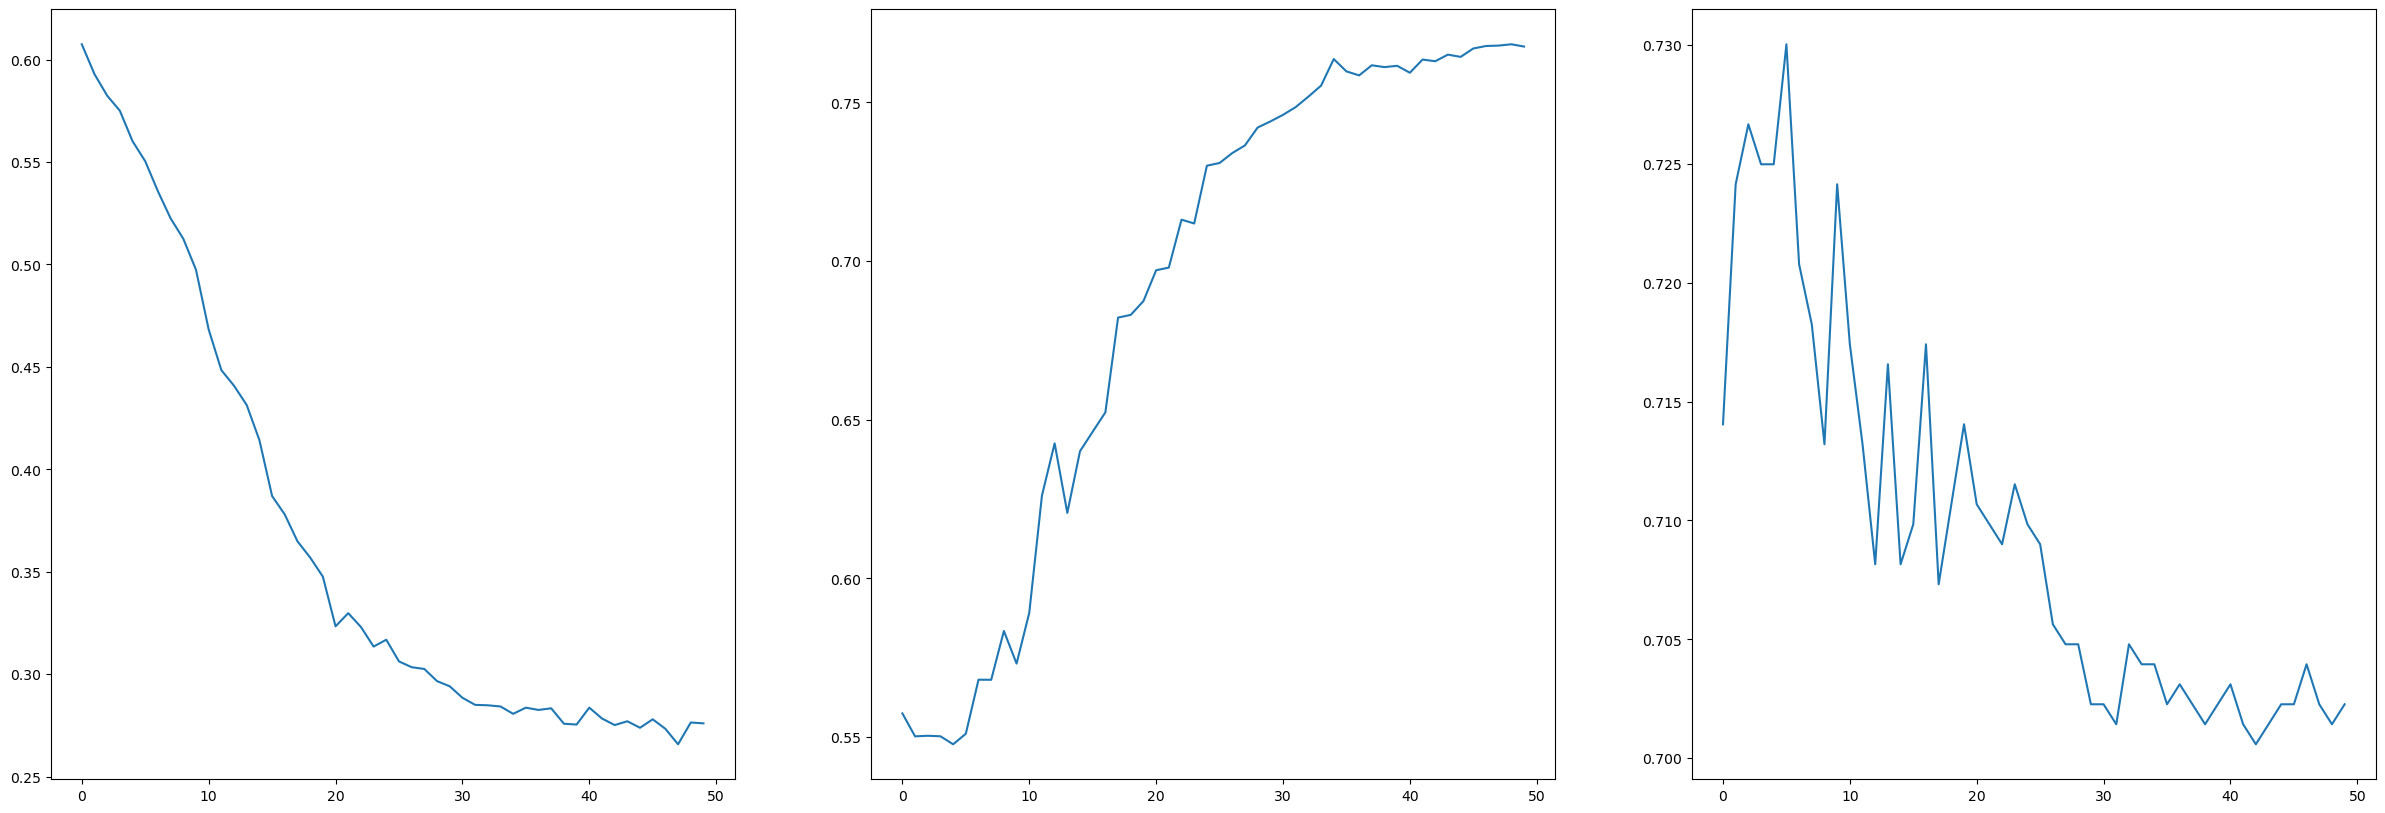

In [23]:
#load model with best performance
# model.load_weights("/home/jj/FYP/Checkpoint/EfficientNet/dense_init_checkpoint/cp-0010.ckpt")
tf.keras.backend.clear_session()
latest = tf.train.latest_checkpoint('/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/dense_init_checkpoint')
model.load_weights(latest)

pre_trained.trainable = True
for layer in pre_trained.layers:
  if isinstance(layer, tf.keras.layers.BatchNormalization):
      layer.trainable = False
for layer in pre_trained.layers[:-63]:
  layer.trainable = False
init_lr = 1e-5
steps = 10000
# final_lr = 1e-6
# lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay( init_lr
                                                            # ,steps
                                                            # ,final_lr
                                                            # ,power=0.5)
model.summary()
checkpoint_path = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/fine_tuning_checkpoint_loss/cp-{epoch:04d}.ckpt"
cp_callback_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
checkpoint_path_2 = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi/fine_tuning_checkpoint_acc/cp-{epoch:04d}.ckpt"
cp_callback_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2, 
    verbose=1, 
    monitor='val_categorical_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
model.compile(
    optimizer= tf.keras.optimizers.legacy.SGD(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)]
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,min_lr=1e-6,verbose=1)
with tf.device('/GPU:0'):
    total_epochs=50
    history_init = model.fit(train_ds_aug
                        ,epochs=total_epochs
                        # ,initial_epoch=initial_epoch
                        ,validation_data=val_ds_aug
                        ,callbacks = [cp_callback_loss,cp_callback_acc,reduce_lr]
                        )
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(history_init.history['loss'])
plt.subplot(132)
plt.plot(history_init.history['val_loss'])
plt.subplot(133)
plt.plot(history_init.history['val_categorical_accuracy'])
tf.keras.backend.clear_session()

# with augment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

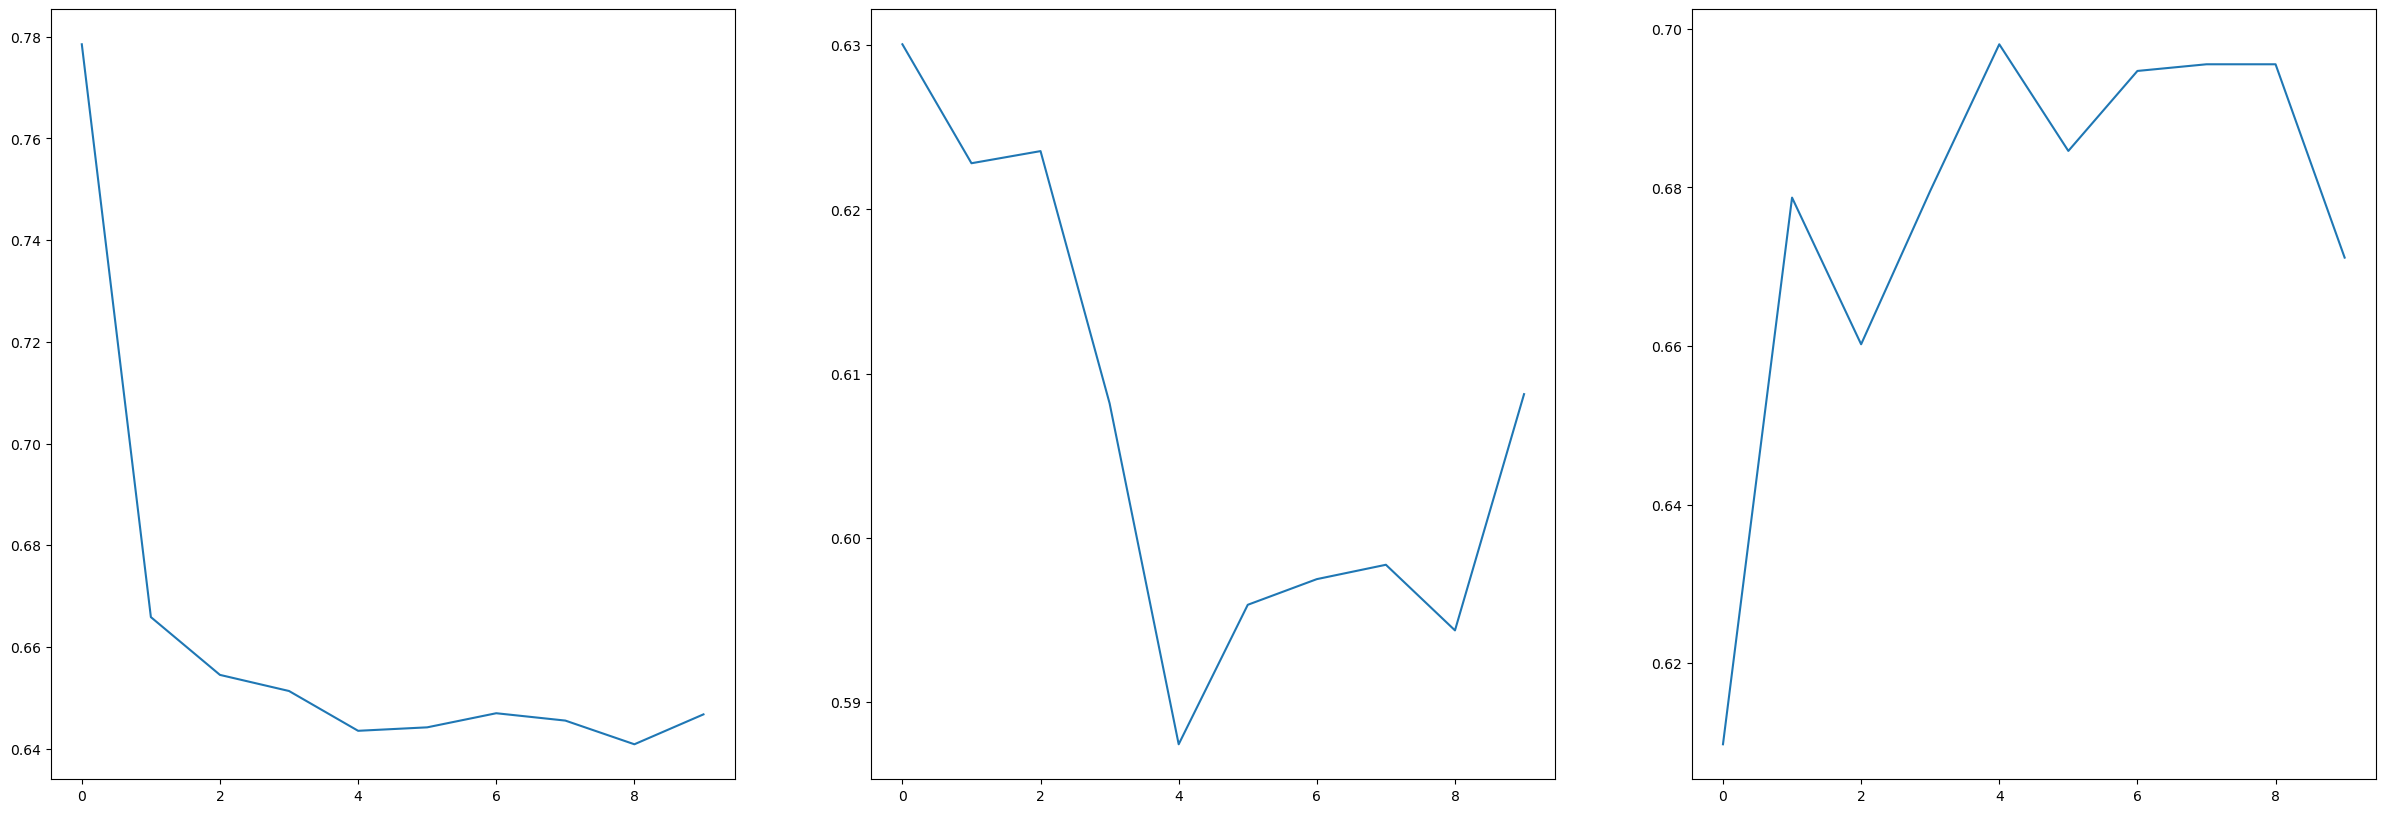

In [24]:
preprocessing = preprocess_input
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
pre_trained.trainable = False
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation((0,0.2),fill_mode='constant'),
  tf.keras.layers.RandomZoom(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2),fill_mode='constant'),
  tf.keras.layers.RandomTranslation(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),fill_mode='constant')
  ])
#Define model_aug architect
tfinput = Input(shape=(img_height,img_width,3))
data_augment = data_augmentation(tfinput,training=True)
pre_process = preprocessing(data_augment)
inceptionv3_model=pre_trained(pre_process,training=False)
# flatten = tf.keras.layers.GlobalAveragePooling2D()(inceptionv3_model)
flatten = tf.keras.layers.Flatten()(inceptionv3_model)
# DO1 = Dropout(0.8)(flatten)
# x = Dense(1024,activation = 'relu')(flatten)
# x = Dense(512,activation='relu')(x)
x = Dense(8,activation = 'relu')(flatten)
x = Dense(8,activation='relu')(x)
x=Dropout(0.5)(x)
# x = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.1))(x)
x = Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.1))(x)
# output = Dense(1, activation="sigmoid")(DO2)
output = Dense(2, activation="softmax")(x)
model_aug = Model(tfinput,output)
model_aug.summary()

model_aug.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)]
    # ,jit_compile=True
)
model_aug.summary()
checkpoint_path = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi_augment/dense_init_checkpoint/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_categorical_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')

#Training Dense layers to initialise the categoriser before fine tuning the CNN mode
with tf.device('/GPU:0'):
    total_epochs = 10
    dense_init = model_aug.fit(train_ds_aug
                        ,epochs=total_epochs
                        ,validation_data=val_ds_aug
                        ,callbacks = [cp_callback]
                        )

# model_aug.save(save_dir + "inceptionv3")
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(dense_init.history['loss'])
plt.subplot(132)
plt.plot(dense_init.history['val_loss'])
plt.subplot(133)
plt.plot(dense_init.history['val_categorical_accuracy'])
tf.keras.backend.clear_session()

In [25]:
# tf.keras.backend.clear_session()
latest = tf.train.latest_checkpoint('/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi_augment/dense_init_checkpoint')
model_aug.load_weights(latest)

pre_trained.trainable = True
for layer in pre_trained.layers:
  if isinstance(layer, tf.keras.layers.BatchNormalization):
      layer.trainable = False
for layer in pre_trained.layers[:-63]:
  layer.trainable = False
init_lr = 1e-5
steps = 10000
# final_lr = 1e-6
# lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay( init_lr
                                                            # ,steps
                                                            # ,final_lr
                                                            # ,power=0.5)
model_aug.summary()
checkpoint_path = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi_augment/fine_tuning_checkpoint_loss/cp-{epoch:04d}.ckpt"
cp_callback_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
checkpoint_path_2 = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm_roi_augment/fine_tuning_checkpoint_acc/cp-{epoch:04d}.ckpt"
cp_callback_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2, 
    verbose=1, 
    monitor='val_categorical_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
model_aug.compile(
    optimizer= tf.keras.optimizers.legacy.SGD(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)]
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,min_lr=1e-6,verbose=1)
with tf.device('/GPU:0'):
    total_epochs=50
    history_init = model_aug.fit(train_ds_aug
                        ,epochs=total_epochs
                        # ,initial_epoch=initial_epoch
                        ,validation_data=val_ds_aug
                        ,callbacks = [cp_callback_loss,cp_callback_acc,reduce_lr]
                        )
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(history_init.history['loss'])
plt.subplot(132)
plt.plot(history_init.history['val_loss'])
plt.subplot(133)
plt.plot(history_init.history['val_categorical_accuracy'])
tf.keras.backend.clear_session()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

KeyboardInterrupt: 

: 

In [69]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('dense_3')
  iterate = tf.keras.models.Model([pre_trained.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = tf.keras.backend.K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") at layer "sequential". The following previous layers were accessed without issue: []

In [17]:
# Test with different optimiser
# latest = tf.train.latest_checkpoint('/home/jj/FYP/Checkpoint/EfficientNetV2_cbis_ddsm/fine_tuning_checkpoint_acc')
latest = tf.train.latest_checkpoint('/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm/fine_tuning_checkpoint_loss')
model.load_weights(latest)
init_lr = 1e-5
steps = 10000
final_lr = 1e-6
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay( init_lr
                                                            ,steps
                                                            ,final_lr
                                                            ,power=0.5)
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
    # ,jit_compile=True
)
checkpoint_path = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm/fine_tuning_checkpoint_loss_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
checkpoint_path_2 = "/home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm/fine_tuning_checkpoint_acc_2/cp-{epoch:04d}.ckpt"
cp_callback_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2, 
    verbose=1, 
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
total_epochs = 100
history_ft_2 = model.fit(train_ds_aug
                    ,epochs=total_epochs
                    # ,initial_epoch=67
                    ,validation_data=val_ds_aug
                    ,callbacks = [cp_callback_loss,cp_callback_acc]
                    )
# model.save(save_dir + "inceptionv3")
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(history_init.history['loss'])
plt.subplot(132)
plt.plot(history_init.history['val_loss'])
plt.subplot(133)
plt.plot(history_init.history['val_binary_accuracy'])

Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 0.5003 - binary_accuracy: 0.7632WARNING:tensorflow:Model was constructed with shape (300, 300, 3) for input KerasTensor(type_spec=TensorSpec(shape=(300, 300, 3), dtype=tf.float32, name='random_flip_input'), name='random_flip_input', description="created by layer 'random_flip_input'"), but it was called on an input with incompatible shape (None, 300, 300, 3).

Epoch 1: val_loss improved from inf to 0.94284, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm/fine_tuning_checkpoint_loss_2/cp-0001.ckpt

Epoch 1: val_binary_accuracy improved from -inf to 0.73345, saving model to /home/jj/FYP/Checkpoint/InceptionV3_cbis_ddsm/fine_tuning_checkpoint_acc_2/cp-0001.ckpt
140/140 [==============================] - 39s 236ms/step - loss: 0.5003 - binary_accuracy: 0.7632 - val_loss: 0.9428 - val_binary_accuracy: 0.7335
Epoch 2/100
140/140 [==============================] - ETA: 0s - loss: 0.4968 - binary_accuracy: 0.75

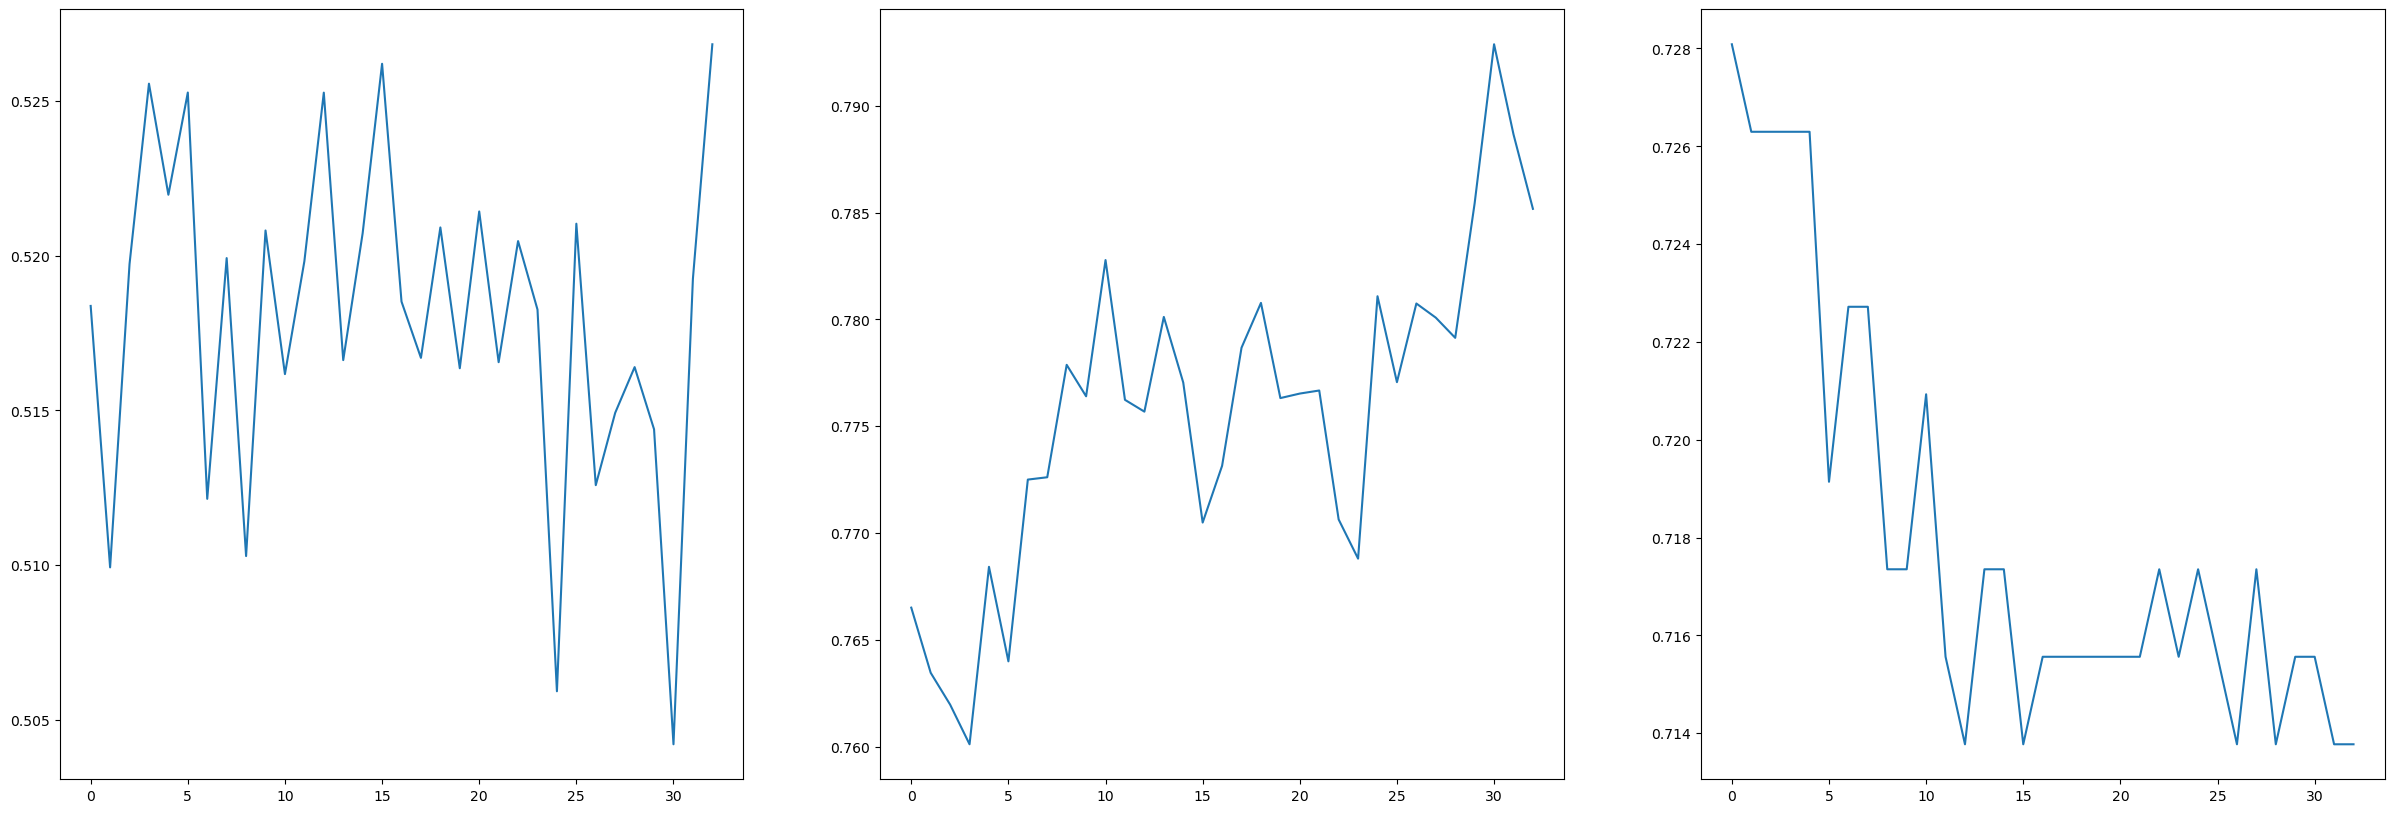

In [16]:
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(history_ft_2.history['loss'])
plt.subplot(132)
plt.plot(history_ft_2.history['val_loss'])
plt.subplot(133)
plt.plot(history_ft_2.history['val_binary_accuracy'])

In [14]:
latest = tf.train.latest_checkpoint('/home/jj/FYP/Checkpoint/EfficientNet_ddsm/fine_tuning_checkpoint_loss')
model.load_weights(latest)
init_lr = 5e-6
steps = 1e5
final_lr = 1e-7
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay( init_lr
                                                            ,steps
                                                            ,final_lr
                                                            ,power=0.5)
pre_trained.trainable = True
for layer in pre_trained.layers:
  if isinstance(layer, tf.keras.layers.BatchNormalization):
      layer.trainable = False
for layer in pre_trained.layers[:63]:
  layer.trainable = False
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 5e-6),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()]
)
model.summary()
checkpoint_path = "/home/jj/FYP/Checkpoint/EfficientNet_ddsm/full_model_checkpoint_loss/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
checkpoint_path_2 = "/home/jj/FYP/Checkpoint/EfficientNet_ddsm/full_model_checkpoint_acc/cp-{epoch:04d}.ckpt"
cp_callback_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2, 
    verbose=1, 
    monitor='val_binary_accuracy',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch')
total_epochs = 100
history_init = model.fit(train_ds_aug
                    ,epochs=total_epochs
                    # ,initial_epoch=38
                    ,validation_data=val_ds_aug
                    ,callbacks = [cp_callback_loss,cp_callback_acc]
                    )
# model.save(save_dir + "inceptionv3")
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.plot(history_init.history['loss'])
plt.subplot(132)
plt.plot(history_init.history['val_loss'])
plt.subplot(133)
plt.plot(history_init.history['val_binary_accuracy'])

ValueError: You are trying to restore a checkpoint from a legacy Keras optimizer into a v2.11+ Optimizer, which can cause errors. Please update the optimizer referenced in your code to be an instance of `tf.keras.optimizers.legacy.Optimizer`, e.g.: `tf.keras.optimizers.legacy.Adam`.

In [ ]:
# for dirName, subdirList, fileList in os.walk('/mnt/c/Users/user/Desktop/CBIS-DDSM/full/'):
#     for fname in fileList:
#         if fname.endswith('.png') and dirName:
#             info = fname.split('_')
#             patient_id = info[1]+ '_' + info[2]
#             mam_type = info[0]
#             view = info[4].split('.')[0]
#             if mam_type =='Calc-Test': 
#                 x = calc_test
#                 train_test = 'test'
#             elif mam_type == 'Calc-Training': 
#                 x = calc_train
#                 train_test = 'train'
#             elif mam_type == 'Mass-Training': 
#                 x = mass_train
#                 train_test = 'train'
#             else: 
#                 x = mass_test
#                 train_test = 'test'
#             for y in x.to_numpy():
#                 if y[0] == patient_id and y[1] == info[3] and y[2] == view:
#                     if y[3] == 'MALIGNANT':
#                         add_type = 'malignant'
#                     else:
#                         add_type = 'benign'
#             shutil.move(dirName+'/'+fname,dirName+train_test+'/'+add_type+'/'+fname)
                